In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from cox_process import *
from inv_levy import*
from e1inv import*

66


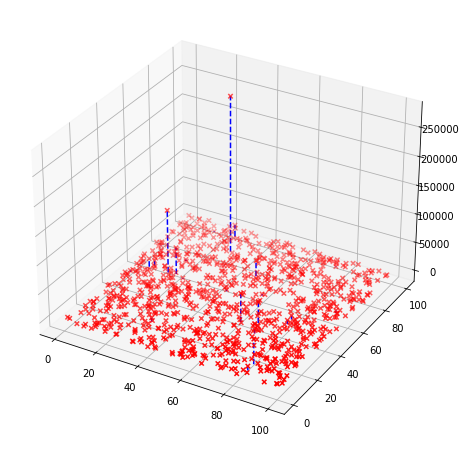

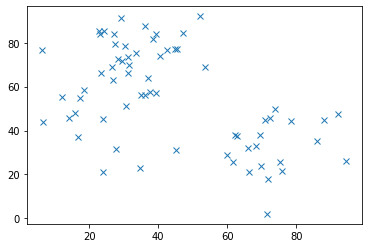

In [2]:
M = 1000
scale = 1.5*(1e5)
shape = 70/scale
sd = 10
sch = 1e-4

limX   = [0,100]
limY   = [0,100]
limXin = [0,100]
limYin = [0,100]
x_obs,y_obs,v,sigma_x, sigma_y = Cox_process(M,shape,scale,sd,limXin,limYin,limX,limY,sch)
print(len(x_obs))



# 3D plot
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# data plot
ax.scatter(sigma_x, sigma_y, v, c='r', marker='x')

for i in range(len(sigma_x)):
    ax.plot([sigma_x[i], sigma_x[i]], [sigma_y[i], sigma_y[i]], [0, v[i]], color='blue', linestyle='--')
plt.show()

plt.plot(x_obs,y_obs,"x")
plt.show()

882.6997048929477


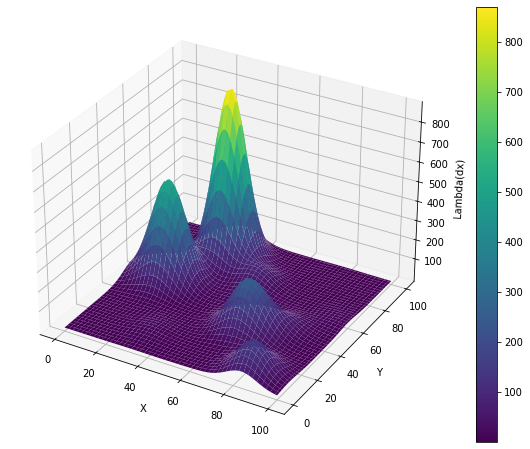

In [3]:
theta3 = sd
means = np.vstack((sigma_x, sigma_y)).T
weights = v
kernel = lambda x,y, mean: 1/(np.pi*(theta3**2))*np.exp(-((x- mean[0])**2 + (y- mean[1])**2)/(theta3**2))

def Lambda_dx(x,y):
    value = 0
    for m in range(np.size(weights)):
        mean = means[m]
        weight = weights[m]
        #print(mean, weight, x,y)
        value = value + weight*kernel(x,y,mean)

    return value

x = np.linspace(limX[0], limX[1], 100)
y = np.linspace(limY[0], limY[1], 100)
X,Y = np.meshgrid(x, y)
Z = Lambda_dx(X,Y)

max = np.max(Z)
print(max)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Aggiunta di una barra dei colori
fig.colorbar(surf)

# Etichette degli assi e titolo
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Lambda(dx)')
#ax.set_title('Lambda(dx)')

plt.show()

    



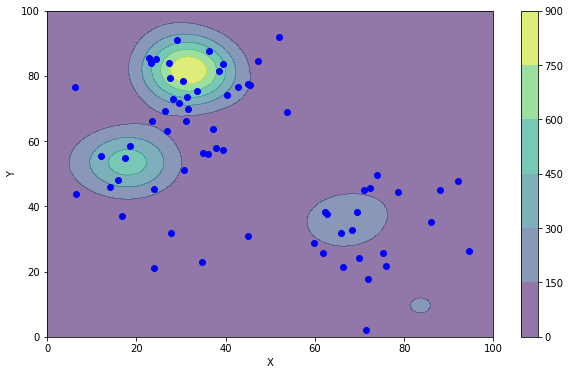

In [4]:
fig = plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z, cmap='viridis', alpha=0.6)
plt.colorbar()  
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_obs,y_obs,"o",color='blue')
plt.show()